In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import timeit

In [2]:
#create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add lat_lngs to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-84.9485014088818, -5.4179735827247555),
 (86.75569081084763, -30.273115679620815),
 (-4.510862160581638, -32.97720121198415),
 (-44.852222838730235, 154.25235653114333),
 (-55.42221995811249, 69.93678949462733),
 (-64.99204535134231, -148.00174047106398),
 (-80.34374552970877, -168.87069597834142),
 (29.94917568961371, 30.737364967247828),
 (62.18252552901407, 124.94146705633068),
 (-54.246637799086145, -121.44497394106732),
 (-27.621040283302328, -4.643155552419472),
 (-4.638465125903366, 153.773398724635),
 (17.878885661564, -106.29478457573373),
 (50.03988521965047, -171.44177436764036),
 (74.00915817894699, -93.05079984358755),
 (60.580429121792406, -28.69911672223097),
 (17.297901096887415, -40.205568557715196),
 (-67.45734663261834, -88.9009423286758),
 (-2.222196986944681, 90.78035183592772),
 (-86.06292334696495, -76.94329245845745),
 (-88.996274328581, -57.380219252582776),
 (52.53003624292913, -133.77300056712338),
 (34.30190589610618, -176.79764245819035),
 (-86.806280325

In [5]:
# Create a list for holding the cities
cities = []

In [6]:
#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city in unique then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

In [7]:
#print the city count
len(cities)

598

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=227bf88c8a943d1dfa6f5286d28d8bfa


In [9]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create the counters
record_count = 1 
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        #convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #append the city information in to city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    #if error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that the data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | sao miguel
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | madinat sittah uktubar
Processing Record 9 of Set 1 | berdigestyakh
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | kokopo
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | olafsvik
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | ketchikan
Processing Record 

Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | borogontsy
Processing Record 43 of Set 4 | manjeshwar
Processing Record 44 of Set 4 | falam
Processing Record 45 of Set 4 | maniitsoq
Processing Record 46 of Set 4 | juneau
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | batagay-alyta
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | longuenesse
Processing Record 1 of Set 5 | burgthann
Processing Record 2 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | tungkang
City not found. Skipping...
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | evanston
Processing Record 8 of Set 5 | londoko
Processing Record 9 of Set 5 | viransehir
Processing Record 10 of Set 5 | anadyr
Processing Record 11 of Set 5 | kirakira
Processing Record 

City not found. Skipping...
Processing Record 28 of Set 8 | brus laguna
Processing Record 29 of Set 8 | oga
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | cherskiy
Processing Record 33 of Set 8 | epe
Processing Record 34 of Set 8 | puerto rondon
Processing Record 35 of Set 8 | sicamous
Processing Record 36 of Set 8 | vestmanna
Processing Record 37 of Set 8 | lushunkou
City not found. Skipping...
Processing Record 38 of Set 8 | calabozo
Processing Record 39 of Set 8 | takoradi
Processing Record 40 of Set 8 | aklavik
Processing Record 41 of Set 8 | antsohihy
Processing Record 42 of Set 8 | araouane
Processing Record 43 of Set 8 | miri
Processing Record 44 of Set 8 | eura
Processing Record 45 of Set 8 | comodoro rivadavia
Processing Record 46 of Set 8 | sabang
Processing Record 47 of Set 8 | kotri
Processing Record 48 of Set 8 | puerto leguizamo
Processing Record 49 of Set 8 | vyshchetarasivka
Processing Record 50 of Set 8 | broom

Processing Record 16 of Set 12 | elizabeth city
Processing Record 17 of Set 12 | shahrud
Processing Record 18 of Set 12 | sexsmith
Processing Record 19 of Set 12 | berlevag
Processing Record 20 of Set 12 | yumen
Processing Record 21 of Set 12 | nichinan
Processing Record 22 of Set 12 | port moresby
Processing Record 23 of Set 12 | hanahan
Processing Record 24 of Set 12 | mago
Processing Record 25 of Set 12 | rungata
City not found. Skipping...
Processing Record 26 of Set 12 | varca
Processing Record 27 of Set 12 | atambua
Processing Record 28 of Set 12 | zhuhai
Processing Record 29 of Set 12 | mitsamiouli
Processing Record 30 of Set 12 | sinnai
Processing Record 31 of Set 12 | alyangula
Processing Record 32 of Set 12 | naryan-mar
Processing Record 33 of Set 12 | zhanaozen
Processing Record 34 of Set 12 | dublin
Processing Record 35 of Set 12 | shirokiy
Processing Record 36 of Set 12 | tir pol
City not found. Skipping...
Processing Record 37 of Set 12 | adre
Processing Record 38 of Set 

In [10]:
len(city_data)

550

In [11]:
#convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,66.79,92,91,5.28,ZA,2021-10-27 21:00:07
1,Sao Miguel,-5.4667,-35.3667,79.54,75,4,16.82,BR,2021-10-27 21:00:08
2,Hobart,-42.8794,147.3294,60.03,70,0,9.22,AU,2021-10-27 21:00:09
3,Saint-Philippe,-21.3585,55.7679,69.39,79,32,10.27,RE,2021-10-27 21:00:10
4,Mataura,-46.1927,168.8643,60.39,69,10,4.07,NZ,2021-10-27 21:00:11
5,Vaini,-21.2000,-175.2000,74.53,74,98,20.94,TO,2021-10-27 21:00:12
6,Madinat Sittah Uktubar,29.8167,31.0500,73.56,54,17,10.96,EG,2021-10-27 21:00:13
7,Berdigestyakh,62.0989,126.6992,24.35,94,100,8.66,RU,2021-10-27 21:00:14
8,Rikitea,-23.1203,-134.9692,73.92,78,28,6.44,PF,2021-10-27 21:00:14
9,Jamestown,42.0970,-79.2353,55.53,78,27,8.01,US,2021-10-27 21:00:15


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-10-27 21:00:07,-34.4187,19.2345,66.79,92,91,5.28
1,Sao Miguel,BR,2021-10-27 21:00:08,-5.4667,-35.3667,79.54,75,4,16.82
2,Hobart,AU,2021-10-27 21:00:09,-42.8794,147.3294,60.03,70,0,9.22
3,Saint-Philippe,RE,2021-10-27 21:00:10,-21.3585,55.7679,69.39,79,32,10.27
4,Mataura,NZ,2021-10-27 21:00:11,-46.1927,168.8643,60.39,69,10,4.07
5,Vaini,TO,2021-10-27 21:00:12,-21.2000,-175.2000,74.53,74,98,20.94
6,Madinat Sittah Uktubar,EG,2021-10-27 21:00:13,29.8167,31.0500,73.56,54,17,10.96
7,Berdigestyakh,RU,2021-10-27 21:00:14,62.0989,126.6992,24.35,94,100,8.66
8,Rikitea,PF,2021-10-27 21:00:14,-23.1203,-134.9692,73.92,78,28,6.44
9,Jamestown,US,2021-10-27 21:00:15,42.0970,-79.2353,55.53,78,27,8.01


In [13]:
#create the output file in csv format
output_data_file = "weather_data/cities.csv"

#export the city_data into the csv
city_df.to_csv(output_data_file, index_label='City_ID')

In [14]:
#extract relevant fields from the df for plotting
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

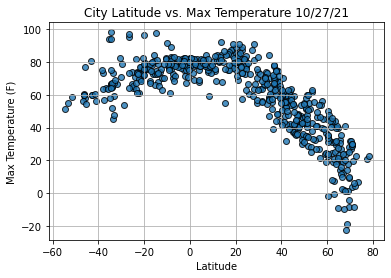

In [15]:
#import the time module
import time

#build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

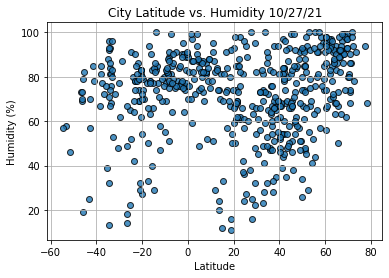

In [16]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

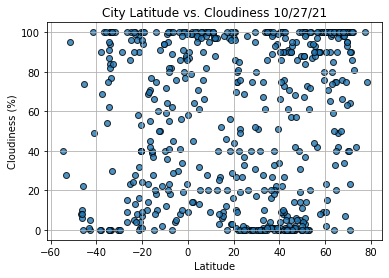

In [17]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

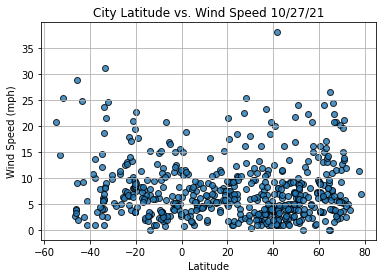

In [18]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [19]:
#import the linear regression module
from scipy.stats import linregress

#Create a function to create and perform a linear regression on the weather data with a line plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Create and run the regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line y-values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #create the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    #Create the scatter plot with regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    
    plt.show()

In [20]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,Madinat Sittah Uktubar,29.8167,31.0500,73.56,54,17,10.96,EG,2021-10-27 21:00:13
7,Berdigestyakh,62.0989,126.6992,24.35,94,100,8.66,RU,2021-10-27 21:00:14
9,Jamestown,42.0970,-79.2353,55.53,78,27,8.01,US,2021-10-27 21:00:15
11,San Patricio,28.0170,-97.5169,91.02,16,0,25.39,US,2021-10-27 21:00:17
12,Provideniya,64.3833,-173.3000,19.51,63,75,8.95,RU,2021-10-27 21:00:18


In [21]:
len(northern_hemi_df)

383

In [22]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,66.79,92,91,5.28,ZA,2021-10-27 21:00:07
1,Sao Miguel,-5.4667,-35.3667,79.54,75,4,16.82,BR,2021-10-27 21:00:08
2,Hobart,-42.8794,147.3294,60.03,70,0,9.22,AU,2021-10-27 21:00:09
3,Saint-Philippe,-21.3585,55.7679,69.39,79,32,10.27,RE,2021-10-27 21:00:10
4,Mataura,-46.1927,168.8643,60.39,69,10,4.07,NZ,2021-10-27 21:00:11


In [23]:
len(southern_hemi_df)

167

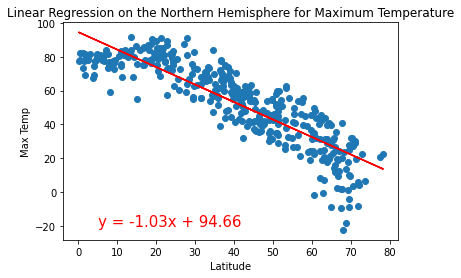

In [83]:
#Linear regression on the N hemisphere (Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (5, -20))

In [109]:
print(f'Analysis of Max Temp in the Northern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Max Temp in the Northern Hemisphere:
-R-squared: 0.139057
-Standard Error: 0.102699
-p-value: 0.006415


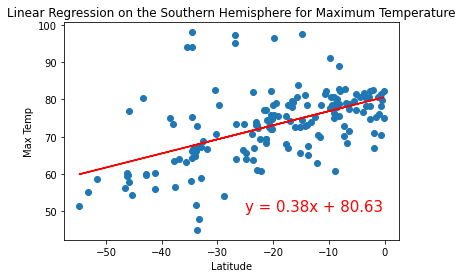

In [110]:
#Linear regression on the S hemisphere (Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-25, 50))


In [111]:
print(f'Analysis of Max Temp in the Southern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Max Temp in the Southern Hemisphere:
-R-squared: 0.524663
-Standard Error: 0.047682
-p-value: 0.000000


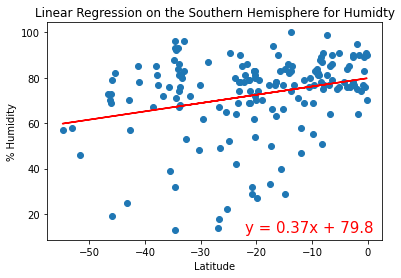

In [112]:
#Linear regression on the S hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Humidty', '% Humidity', (-22, 12))


In [113]:
print(f'Analysis of Humidity in the Southern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Humidity in the Southern Hemisphere:
-R-squared: 0.273925
-Standard Error: 0.099882
-p-value: 0.000341


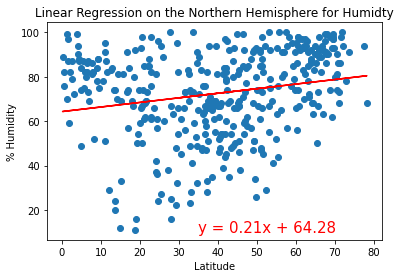

In [114]:
#Linear regression on the N hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Humidty', '% Humidity', (35, 10))


In [115]:
print(f'Analysis of Humidity in the Nothern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Humidity in the Nothern Hemisphere:
-R-squared: 0.210893
-Standard Error: 0.048973
-p-value: 0.000032


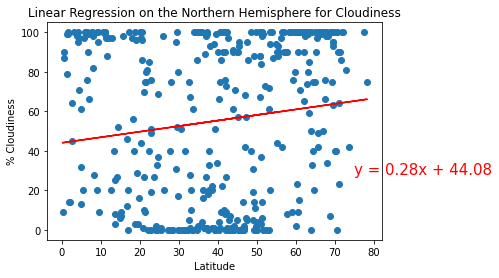

In [116]:
#Linear regression on the N hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness', (75, 28))


In [117]:
print(f'Analysis of Cloudiness in the Northern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Cloudiness in the Northern Hemisphere:
-R-squared: 0.139057
-Standard Error: 0.102699
-p-value: 0.006415


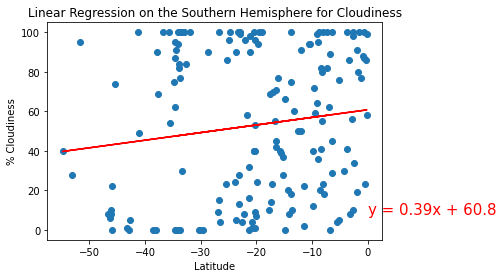

In [118]:
#Linear regression on the S hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Cloudiness', '% Cloudiness', (0, 8))


In [119]:
print(f'Analysis of Cloudiness in the Southern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Cloudiness in the Southern Hemisphere:
-R-squared: 0.137847
-Standard Error: 0.215494
-p-value: 0.075652


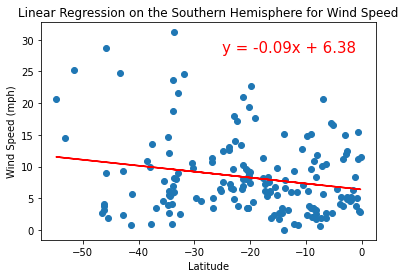

In [120]:
#Linear regression on the S hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-25, 28))


In [121]:
print(f'Analysis of Wind Speed in the Southern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Wind Speed in the Southern Hemisphere:
-R-squared: -0.208626
-Standard Error: 0.034213
-p-value: 0.006817


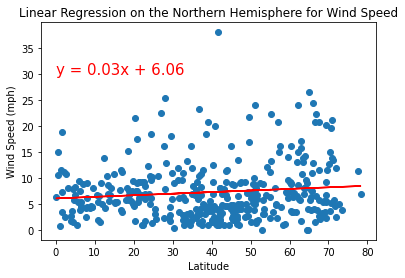

In [122]:
#Linear regression on the N hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (0, 30))


In [123]:
print(f'Analysis of Wind Speed in the Northern Hemisphere:')
result = linregress(x_values, y_values)
print(f'-R-squared: {result.rvalue:.6f}')
print(f'-Standard Error: {result.stderr:.6f}')
print(f'-p-value: {result.pvalue:.6f}')

Analysis of Wind Speed in the Northern Hemisphere:
-R-squared: 0.111925
-Standard Error: 0.013851
-p-value: 0.028514
